In [2]:
import matplotlib.pyplot as plt
import mne
import os
import numpy as np

# Plotting
# Plot Options
combine = "mean" 
dB = False
vmin = 0
vmax = 0.2
fmin = 0.5
fmax = 100

fname = 'xxx'
tfr_plot = mne.time_frequency.read_tfrs(fname)[0]

# trf.plot()
tfr_list = []
root_path = 'xxx'
sub_files = os.listdir(root_path)
for sub in sub_files:
    sub_file = os.path.join(root_path, sub)
    session_files = os.listdir(sub_file)
    for ses in session_files:
        if (sub == 'sub-10' and ses == 'session-1') or \
            (sub == 'sub-10' and ses == 'session-2') or \
            (sub == 'sub-10' and ses == 'session-4') or \
            (sub == 'sub-10' and ses == 'session-5') or \
            (sub == 'sub-11' and ses == 'session-1'):
            continue
        ses_file = os.path.join(sub_file, ses)
        tfr_ses = mne.time_frequency.read_tfrs(ses_file+'/itc-tfr.h5')[0]
        tfr_list.append(tfr_ses.data)


Reading /disk2/dongliang/data_acquisition/all_inner_speech2/derivatives_tfr/sub-3/session-1/itc-tfr.h5 ...
Reading /disk2/dongliang/data_acquisition/all_inner_speech2/derivatives_tfr/sub-9/session-3/itc-tfr.h5 ...
Reading /disk2/dongliang/data_acquisition/all_inner_speech2/derivatives_tfr/sub-9/session-2/itc-tfr.h5 ...
Reading /disk2/dongliang/data_acquisition/all_inner_speech2/derivatives_tfr/sub-9/session-1/itc-tfr.h5 ...
Reading /disk2/dongliang/data_acquisition/all_inner_speech2/derivatives_tfr/sub-9/session-4/itc-tfr.h5 ...
Reading /disk2/dongliang/data_acquisition/all_inner_speech2/derivatives_tfr/sub-9/session-5/itc-tfr.h5 ...
Reading /disk2/dongliang/data_acquisition/all_inner_speech2/derivatives_tfr/sub-3/session-3/itc-tfr.h5 ...
Reading /disk2/dongliang/data_acquisition/all_inner_speech2/derivatives_tfr/sub-3/session-2/itc-tfr.h5 ...
Reading /disk2/dongliang/data_acquisition/all_inner_speech2/derivatives_tfr/sub-3/session-1/itc-tfr.h5 ...
Reading /disk2/dongliang/data_acquisi

(29, 300, 2501)
No baseline correction applied


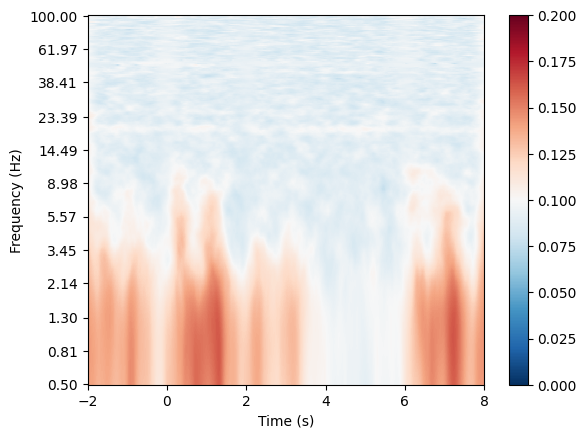

In [4]:
fig = plt.figure()
ax = plt.axes()
tfr_avg = np.mean(tfr_list, axis=0)
print(tfr_avg.shape)
tfr_plot.data = tfr_avg
tfr_plot.plot(combine=combine, dB=dB, axes=ax, vmin=vmin,
         vmax=vmax, fmin=fmin, fmax=fmax)
fig.savefig('fig/ITC.pdf',bbox_inches='tight',dpi=300,pad_inches=0.0)                # noqa
